In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.set_option("display.max_columns", None)

In [2]:
eda = pd.read_json("data/data.json")


In [14]:
eda2 = eda.iloc[0:1,:].drop(["acct_type"], axis = 1)

In [15]:
eda2.to_json("data/example2.json")

In [25]:
dict_test = eda2.T.to_dict().values()
dict_test

[{u'approx_payout_date': 1266062400,
  u'body_length': 3852,
  u'channels': 5,
  u'country': u'US',
  u'currency': u'USD',
  u'delivery_method': 0.0,
  u'description': u'<p><a href="http://s432.photobucket.com/albums/qq49/digusonline/?action=view&amp;current=supersunday.jpg" target="_blank"><img src="http://i432.photobucket.com/albums/qq49/digusonline/supersunday.jpg" border="0" alt="Photobucket" /></a></p>\r\n<p>\xa0</p>\r\n<p style="text-align: center;"><font size="3"><strong>Party Starz Entertaintment &amp; Diverse International Group Presents...<br /></strong></font><br /><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>The Official\xa0"99 Hour No Sleep" Super Bowl </strong></font></p>\r\n<p style="text-align: center;"><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>Weekend </strong></font><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>Grand Finale</strong></font></p>\r\n<p><br /><span style="font-family: Times New Roman,serif;"><font

In [17]:
eda[["approx_payout_date",
                                            "event_created",
                                            "event_end",
                                            "event_published",
                                            "event_start",
                                            "user_created"]].head(5)

,approx_payout_date,event_created,event_end,event_published,event_start,user_created
0,2010-02-13 12:00:00,2010-01-06 01:01:46,2010-02-08 12:00:00,2010-01-10 07:50:38,2010-02-08 02:00:00,2009-11-30 20:45:50
1,2011-02-03 08:00:00,2010-12-31 21:57:50,2011-01-29 08:00:00,2010-12-31 22:08:15,2011-01-28 23:00:00,2010-08-04 17:26:16
2,2011-01-28 00:00:00,2010-11-30 04:22:36,2011-01-23 00:00:00,2010-11-30 04:38:28,2011-01-22 16:30:00,2010-04-29 16:43:08
3,2014-01-06 00:00:00,2013-02-12 15:06:10,2014-01-01 00:00:00,2013-02-12 15:37:26,2013-02-12 21:00:00,2010-09-07 14:35:02
4,2011-02-17 00:00:00,2010-12-10 15:24:26,2011-02-12 00:00:00,2010-12-10 15:29:26,2011-02-11 16:00:00,2010-11-05 19:07:45


In [4]:
print(eda["acct_type"].unique())
print(eda.groupby(["acct_type"])["acct_type"].count())

[u'fraudster_event' u'premium' u'spammer_warn' u'fraudster'
 u'spammer_limited' u'spammer_noinvite' u'locked' u'tos_lock' u'tos_warn'
 u'fraudster_att' u'spammer_web' u'spammer']
acct_type
fraudster             437
fraudster_att           5
fraudster_event       851
locked                 54
premium             12373
spammer                 1
spammer_limited       218
spammer_noinvite       84
spammer_warn          144
spammer_web             2
tos_lock               77
tos_warn               91
Name: acct_type, dtype: int64


In [5]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14337 entries, 0 to 14336
Data columns (total 44 columns):
acct_type             14337 non-null object
approx_payout_date    14337 non-null int64
body_length           14337 non-null int64
channels              14337 non-null int64
country               14256 non-null object
currency              14337 non-null object
delivery_method       14321 non-null float64
description           14337 non-null object
email_domain          14337 non-null object
event_created         14337 non-null int64
event_end             14337 non-null int64
event_published       14238 non-null float64
event_start           14337 non-null int64
fb_published          14337 non-null int64
gts                   14337 non-null float64
has_analytics         14337 non-null int64
has_header            8928 non-null float64
has_logo              14337 non-null int64
listed                14337 non-null object
name                  14337 non-null object
name_length      

In [16]:
def eda_unix_to_datetime(df, columns = ["approx_payout_date","event_created","event_end"]):
    '''
    Convert the columns of unix time to datetime object
    Input: DataFrame, columns to convert
    Output: DataFrame with columns converted to datetime object
    '''
    for column in columns:
        df[column] = pd.to_datetime(df[column], unit='s')
    return df
eda2 = eda_unix_to_datetime(eda, columns = ["approx_payout_date",
                                            "event_created",
                                            "event_end",
                                            "event_published",
                                            "event_start",
                                            "user_created"])

In [26]:
def description_word_count(df,columns = ["description","org_desc"]):
    '''
    Creat two columns that counts the words in html input columns
    Name of the column is "column"_wc
    input: dataframe, the columns that contains html contents
    Return : datafram with addtional columns contains the word count for the description column
    '''
    for column in columns:
        n = df["acct_type"].count()
        df[column + "_wc"] = 0 
        for i in range(2000):
            if i%1000 ==1:
                print(i, float(i)/n)
            html = BeautifulSoup(df[column][i], "html.parser")
            df[column + "_wc"][i] = len(html.get_text().split(" "))
    return df
eda3 = description_word_count(eda2)

/home/jingbo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


(1, 6.97495989398061e-05)
(1001, 0.0698193485387459)
(1, 6.97495989398061e-05)
(1001, 0.0698193485387459)


In [30]:
eda3["fraud"] = 1
eda3.loc[eda3["acct_type"] == "premium", "fraud"] = 0

In [31]:
eda3.head(5)

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,description_wc,org_desc_wc,payee_org_iou,fraud
0,fraudster_event,2010-02-13 12:00:00,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,2010-01-06 01:01:46,2010-02-08 12:00:00,2010-01-10 07:50:38,2010-02-08 02:00:00,0,0.00,0,1.0,0,y,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEN...",60,0,0,527017,,0.0,Party Starz Ent & Diverse Int'l Group,0.0,,,[],29.0,33,1,"[{u'event_id': 527017, u'cost': 25.0, u'availa...",36,2009-11-30 20:45:50,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,229,1,0.000000,1
1,premium,2011-02-03 08:00:00,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,2010-12-31 21:57:50,2011-01-29 08:00:00,2010-12-31 22:08:15,2011-01-28 23:00:00,0,868.02,0,0.0,1,n,Winthrop RUF Winter Getaway,27,23,1,786878,"<p>Since 1987, RUF has ministered to students ...",0.0,RUF at Winthrop University,12.0,RUF,CHECK,"[{u'name': u'RUF', u'created': u'2010-10-01 01...",28.0,28,0,"[{u'event_id': 786878, u'cost': 35.0, u'availa...",149,2010-08-04 17:26:16,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,474,98,0.250000,0
2,premium,2011-01-28 00:00:00,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,2010-11-30 04:22:36,2011-01-23 00:00:00,2010-11-30 04:38:28,2011-01-22 16:30:00,0,3500.00,0,NaN,0,y,DRDP (2010) Teacher Training,28,19,4,787337,"<p><a href=""http://www.desiredresults.com"">www...",0.0,University Preparation School in collaboration...,0.0,University Preparation School,CHECK,"[{u'name': u'Danielle Severn', u'created': u'2...",54.0,54,0,"[{u'event_id': 787337, u'cost': 93.51, u'avail...",214,2010-04-29 16:43:08,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,248,1,0.187500,0
3,premium,2014-01-06 00:00:00,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,2013-02-12 15:06:10,2014-01-01 00:00:00,2013-02-12 15:37:26,2013-02-12 21:00:00,0,1167.35,0,0.0,1,y,ITTA Affiliation 2013,21,39,16,885645,,0.0,,0.0,,ACH,"[{u'name': u'', u'created': u'2010-11-09 01:10...",0.0,0,0,"[{u'event_id': 885645, u'cost': 25.0, u'availa...",889,2010-09-07 14:35:02,3,,None,NaN,NaN,None,None,719,1,0.000000,0
4,premium,2011-02-17 00:00:00,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,2010-12-10 15:24:26,2011-02-12 00:00:00,2010-12-10 15:29:26,2011-02-11 16:00:00,1,2313.15,0,0.0,0,y,Self Defense for Writers and Filmmakers: For A...,66,30,0,1114349,"<p><font face=""Arial""><font size=""2""><strong>T...",0.0,Arts & Business Council of Greater Boston,0.0,Arts and Business Council or Greater Boston,CHECK,[{u'name': u'Arts and Business Council or Grea...,63.0,63,0,"[{u'event_id': 1114349, u'cost': 150.0, u'avai...",35,2010-11-05 19:07:45,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,350,34,0.714286,0


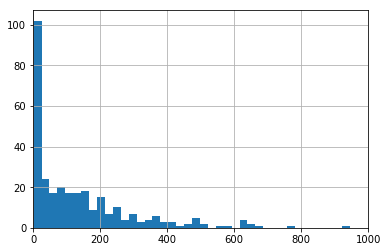

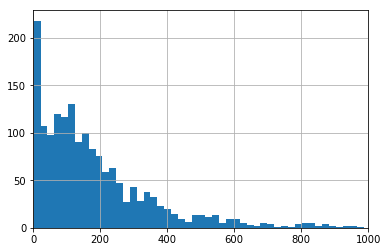

In [61]:
eda4 = eda3.iloc[0:2000]
eda4.loc[eda4["fraud"] == 1, "description_wc"].hist(bins = 40)
plt.xlim(0, 1000)
plt.show()

eda4.loc[eda4["fraud"] == 0, "description_wc"].hist(bins = 150)
plt.xlim(0, 1000)
plt.show()

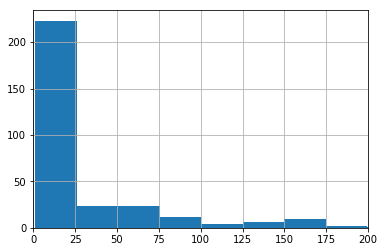

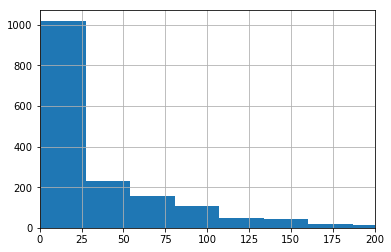

In [68]:
eda4.loc[eda4["fraud"] == 1, "org_desc_wc"].hist(bins = 20)
plt.xlim(0, 200)
plt.show()
eda4.loc[eda4["fraud"] == 0, "org_desc_wc"].hist(bins = 40)
plt.xlim(0, 200)
plt.show()

In [43]:
print(eda3.loc[eda3["fraud"] == 1, "description_wc"].mean())
print(eda3.loc[eda3["fraud"] == 0, "description_wc"].mean())

21.3788187373
27.2208841833


In [46]:
print(eda3.loc[eda3["fraud"] == 1, "org_desc_wc"].mean())
print(eda3.loc[eda3["fraud"] == 0, "org_desc_wc"].mean())

4.20315682281
5.51531560656


In [6]:
print(eda["payee_name"][0:5])
print(eda["org_name"][0:5])

0                                               
1                                            RUF
2                  University Preparation School
3                                               
4    Arts and Business Council or Greater Boston
Name: payee_name, dtype: object
0                Party Starz Ent & Diverse Int'l Group
1                           RUF at Winthrop University
2    University Preparation School in collaboration...
3                                                     
4           Arts & Business Council of Greater Boston 
Name: org_name, dtype: object


In [7]:
st1 = eda["payee_name"][5]
st2 = eda["org_name"][5]

In [10]:
st1.split()

[u'Bluegrass', u'Stallions']

In [11]:
st2.split()

[u'Bluegrass', u'Stallions', u'Basketball']

In [14]:
len(set(st1.split()) & set(st2.split())) / float(max(len(set(st1.split())),len(set(st2.split()))))

0.6666666666666666

In [27]:
def payee_org_name(df):
    n = df["acct_type"].count()
    df["payee_org_iou"] = 0.0
    for i in range(n):
        if i%1000 == 1:
            print(i, float(i)/n)
        st1 = df["payee_name"][i]
        st2 = df["org_name"][i]
        if float(max(len(set(st1.split())),len(set(st2.split())))) > 0:
            df["payee_org_iou"][i] = len(set(st1.split()) & set(st2.split())) \
                                /float(max(len(set(st1.split())),len(set(st2.split()))))
    return df
eda4 = payee_org_name(eda)

/home/jingbo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


(1, 6.97495989398061e-05)
(1001, 0.0698193485387459)
(2001, 0.139568947478552)
(3001, 0.2093185464183581)
(4001, 0.2790681453581642)
(5001, 0.3488177442979703)
(6001, 0.4185673432377764)
(7001, 0.4883169421775825)
(8001, 0.5580665411173886)
(9001, 0.6278161400571947)
(10001, 0.6975657389970008)
(11001, 0.7673153379368068)
(12001, 0.837064936876613)
(13001, 0.906814535816419)
(14001, 0.9765641347562252)


In [69]:
eda4.head(2)

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,description_wc,org_desc_wc,payee_org_iou,fraud
0,fraudster_event,2010-02-13 12:00:00,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,2010-01-06 01:01:46,2010-02-08 12:00:00,2010-01-10 07:50:38,2010-02-08 02:00:00,0,0.00,0,1.0,0,y,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEN...",60,0,0,527017,,0.0,Party Starz Ent & Diverse Int'l Group,0.0,,,[],29.0,33,1,"[{u'event_id': 527017, u'cost': 25.0, u'availa...",36,2009-11-30 20:45:50,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,229,1,0.00,1
1,premium,2011-02-03 08:00:00,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,2010-12-31 21:57:50,2011-01-29 08:00:00,2010-12-31 22:08:15,2011-01-28 23:00:00,0,868.02,0,0.0,1,n,Winthrop RUF Winter Getaway,27,23,1,786878,"<p>Since 1987, RUF has ministered to students ...",0.0,RUF at Winthrop University,12.0,RUF,CHECK,"[{u'name': u'RUF', u'created': u'2010-10-01 01...",28.0,28,0,"[{u'event_id': 786878, u'cost': 35.0, u'availa...",149,2010-08-04 17:26:16,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,474,98,0.25,0


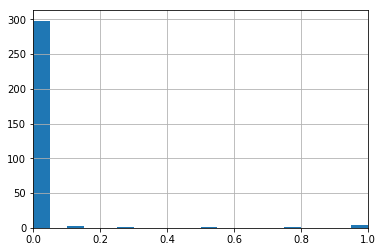

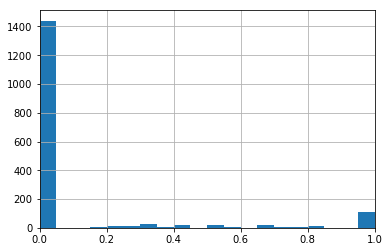

In [72]:
eda4.loc[eda4["fraud"] == 1, "payee_org_iou"].hist(bins = 20)
plt.xlim(0, 1)
plt.show()
eda4.loc[eda4["fraud"] == 0, "payee_org_iou"].hist(bins = 20)
plt.xlim(0, 1)
plt.show()

In [73]:
eda4.head(2)

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,description_wc,org_desc_wc,payee_org_iou,fraud
0,fraudster_event,2010-02-13 12:00:00,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,2010-01-06 01:01:46,2010-02-08 12:00:00,2010-01-10 07:50:38,2010-02-08 02:00:00,0,0.00,0,1.0,0,y,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEN...",60,0,0,527017,,0.0,Party Starz Ent & Diverse Int'l Group,0.0,,,[],29.0,33,1,"[{u'event_id': 527017, u'cost': 25.0, u'availa...",36,2009-11-30 20:45:50,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,229,1,0.00,1
1,premium,2011-02-03 08:00:00,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,2010-12-31 21:57:50,2011-01-29 08:00:00,2010-12-31 22:08:15,2011-01-28 23:00:00,0,868.02,0,0.0,1,n,Winthrop RUF Winter Getaway,27,23,1,786878,"<p>Since 1987, RUF has ministered to students ...",0.0,RUF at Winthrop University,12.0,RUF,CHECK,"[{u'name': u'RUF', u'created': u'2010-10-01 01...",28.0,28,0,"[{u'event_id': 786878, u'cost': 35.0, u'availa...",149,2010-08-04 17:26:16,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,474,98,0.25,0


In [114]:
eda3["user_type"].unique()

array([  1,   3,   4,   5, 103,   2])

In [104]:
eda_count = eda3.groupby(["email_domain","fraud"]).count()
print(len(eda_count))
len(eda3["fraud"] == 1)
len(eda) - len(eda["acct_type"] == "premium")

5816


0

In [101]:
eda_count[eda_count["acct_type"] > 15]

acct_type  approx_payout_date  body_length  \
email_domain             fraud                                               
aol.com                  False         24                  24           24   
                         True         174                 174          174   
busboysandpoets.com      True          21                  21           21   
claytonislandtours.com   True          37                  37           37   
comcast.net              True          57                  57           57   
cox.net                  True          17                  17           17   
discodonniepresents.com  True          16                  16           16   
doctor.cnc.net           True          20                  20           20   
dsicomedy.com            True          20                  20           20   
generalassemb.ly         False         16                  16           16   
                         True          42                  42           42   
gmail.com                False        819                 819          819   
                         True        2278                2278         2278   
googlemail.com           False         17                  17           17   
greatworldadventures.com True          31                  31           31   
guardian.co.uk           False         24                  24           24   
hotmail.co.uk            False         48                  48           48   
hotmail.com              False        138                 138          138   
                         True         261                 261          261   
improvboston.com         True          46                  46           46   
jhilburn.com             True          21                  21           21   
joonbug.com              True          23                  23           23   
jumpnasiumparty.com      True          16                  16           16   
kineticevents.com        True          52                  52           52   
lidf.co.uk               False         35                  35           35   
live.co.uk               False         23                  23           23   
live.com                 False         44                  44           44   
                         True          36                  36           36   
live.fr                  False         32                  32           32   
mac.com                  True          16                  16           16   
me.com                   True          60                  60           60   
msn.com                  True          22                  22           22   
o-cinema.org             True          20                  20           20   
pricecutteronline.com    True          16                  16           16   
racetonowhere.com        True          35                  35           35   
sbcglobal.net            True          25                  25           25   
senecalakewine.com       True          20                  20           20   
shaw.ca                  False         28                  28           28   
sippingnpainting.com     True          39                  39           39   
themagnetictheatre.org   True          19                  19           19   
tribecafilmfestival.org  True          16                  16           16   
verizon.net              True          18                  18           18   
webookbands.com          True          17                  17           17   
wholefoods.com           True          17                  17           17   
womenlikeus.org.uk       False         19                  19           19   
yahoo.ca                 False         29                  29           29   
yahoo.co.uk              False         47                  47           47   
yahoo.com                False        158                 158          158   
                         True         634                 634          634   
ymail.com                False         27             